In [1]:
import pandas as pd

In [5]:
# read data
info_data =  pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML/Infosy_test_multocorr.xlsx")

In [ ]:
info_data.head()

# Missing Values Treatment

Number of missing values before treatment

In [13]:
# number of missing/NaN data points per column
NaN_count = info_data.isnull().sum()
t_NaN = NaN_count.sum()
print(t_NaN)

536


In [14]:
# replace all NaN's with the value that comes directly after it in the same column, 
# then replace all the remaining NaN's with 0

no_na_data = info_data.fillna(method='bfill', axis=0).fillna(0)

Number of missing values after treatment

In [15]:
# number of missing/NaN data points per column
NaN_count = no_na_data.isnull().sum()
t_NaN = NaN_count.sum()
print(t_NaN)

0


In [ ]:
no_na_data.head()

# Normalization

In [22]:
# normalization using the min_max feature scaling
# copy the dataframe
data_norm = no_na_data
for col in no_na_data.columns:
	data_norm[col] = (data_norm[col] - data_norm[col].min()) / (data_norm[col].max() - data_norm[col].min())	

In [ ]:
# print normalized data
data_norm.head()

# Standardization

In [24]:
# standardization using the Z-score method
# copy the dataFrame
data_std = data_norm
for col in data_std.columns:
	data_std[col] = (data_std[col] -
						data_std[col].mean()) / data_std[col].std()	

In [ ]:
# print standardized data
data_std.head()

# Remove Multicollinearity

In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# copy dataFrame
data_coll = data_std

In [29]:
# create an empty dataFrame
vif_df = pd.DataFrame()

In [ ]:
# assign VIF value to 'VIF_value' collumn of 'vif_df' dataFrame
vif_df['VIF_value'] = [variance_inflation_factor(data_coll.values, i) for i in range(data_coll.shape[1])]

# generate 'Column name' with column names
vif_df['Column_name'] = data_coll.columns

# sort data in descending order of VIF_value
vif_df.sort_values('VIF_value', ascending=False)

In [34]:
# count total number of features with VIF<120
count = 0
for i in range(vif_df.shape[0]) :
  if vif_df.VIF_value[i] < 120 :
    count = count +1
print(count)

38


In [45]:
# Create a new dataFrame with the selected features having VIF<120 (TOTAL 38 features selected)
feature_df = data_coll[['Directional Index (DX)','Directional Indicator DI14(-)','ADX','Daily Return','Index VaR','FULL STOCHASTIC (FS)%D(Full)','Relative Strength, RS for the last (05days )','EASE OF MOVEMENT (EMV)','FULL STOCHASTIC (FS)%K(Full)','Directional Indicator DI14(+)','CHAIKIN MONEY FLOW (CHMF)','% Dly Qt to Traded Qty','MONEY FLOW INDEX (MFI)6-day Money ratio (MRN)','DM14(-)','Relative Strength Index (RSI)','Money flow Index (MFI)','COMMODITY CHANNEL INDEX (CCI)','Mean Deviation','No. of Trades(orders)',"absolute value of the difference between the last period's SMATP and the typical price for each of the past 5 periods",'Deliverable Qty','TR14','STANDARD DEVIATION (STDEV)(closing prices for 5 days)','DM14(+)','Initial Average gain (05days )','Initial Average gainLosses (05days )','RATE OF CHANGE (ROC)(5Days)',"Average  loss(05days )",'Average gain (05days )','True range','DM(-)','DETRENDED PRICE OSCILLATOR (DPO)','AVERAGE TRUE RANGE (ATR)','Standard deviation(σ (39))','DM(+)',"Highest high-Lowest low ",'Nifty 50 Close price',"Current Close-Lowest Low "]]


In [40]:
# shape of feature_df
feature_df.shape

(252, 38)

In [ ]:
# display feature_df
feature_df.head()

In [42]:
vif_df.sort_values('VIF_value', ascending=False)

VIF_value                                        Column_name
0         inf                                         Prev Close
43        inf                                        Recent High
45        inf  Trend and difference of Recent High and Recent...
46        inf  Absolute difference of Recent High and Recent Low
47        inf                    Fibonacci Retracement 38.2%(FR)
..        ...                                                ...
95   4.042012                                          Index VaR
26   1.995458                                       Daily Return
23   1.438677                                                ADX
21   1.343057                      Directional Indicator DI14(-)
22   1.297255                             Directional Index (DX)

[96 rows x 2 columns]

In [ ]:
# Generating new features
feature_df['Close price_diff'] = feature_df['Current Close-Lowest Low '] - feature_df['Nifty 50 Close price']
feature_df['DM_diff'] = feature_df['DM(+)'] - feature_df['DM(-)']
feature_df['Standard_deviation_diff'] = feature_df['Standard deviation(σ (39))'] - feature_df['STANDARD DEVIATION (STDEV)(closing prices for 5 days)']
feature_df['TR_diff'] = feature_df['True range'] - feature_df['TR14']
feature_df['avg_gain-loss_diff'] = feature_df['Average gain (05days )'] - feature_df['Average  loss(05days )']
feature_df['initial_gain-loss_diff'] = feature_df['Initial Average gainLosses (05days )'] - feature_df['Initial Average gain (05days )']
feature_df['DM_diff'] = feature_df['DM14(+)'] - feature_df['DM14(-)']
feature_df['Qty_diff'] = feature_df['Deliverable Qty'] - feature_df['No. of Trades(orders)']
feature_df['money_flow_diff'] = feature_df['Money flow Index (MFI)'] - feature_df['MONEY FLOW INDEX (MFI)6-day Money ratio (MRN)']

In [48]:
# drop old features
final_feature_df = feature_df.drop(['Current Close-Lowest Low ','Nifty 50 Close price','Highest high-Lowest low ','DM(+)','DM(-)','Standard deviation(σ (39))','STANDARD DEVIATION (STDEV)(closing prices for 5 days)','AVERAGE TRUE RANGE (ATR)','True range','TR14','DETRENDED PRICE OSCILLATOR (DPO)','Average gain (05days )','Average  loss(05days )','RATE OF CHANGE (ROC)(5Days)','Initial Average gainLosses (05days )','Initial Average gain (05days )','DM14(+)','DM14(-)','Deliverable Qty','No. of Trades(orders)',"absolute value of the difference between the last period's SMATP and the typical price for each of the past 5 periods",'Money flow Index (MFI)','MONEY FLOW INDEX (MFI)6-day Money ratio (MRN)','Mean Deviation','COMMODITY CHANNEL INDEX (CCI)','Relative Strength Index (RSI)','% Dly Qt to Traded Qty','CHAIKIN MONEY FLOW (CHMF)','Directional Indicator DI14(+)'], axis=1)

In [51]:
# shape of final feature DataFrame
final_feature_df.shape

(252, 17)

In [53]:
# display final selected featurers
final_feature_df

Directional Index (DX)  Directional Indicator DI14(-)       ADX  \
0                  0.746153                       0.030870  0.729049   
1                  0.746153                       0.030870  0.729049   
2                  0.746153                       0.030870  0.729049   
3                 -0.236248                       0.007514  0.729049   
4                 -0.195972                       0.007451 -0.250423   
..                      ...                            ...       ...   
247               -0.167460                      -0.066938 -0.170007   
248               -0.127585                       0.000796 -0.176361   
249                0.757602                       0.139879 -0.068376   
250                0.647963                       0.019097  0.808528   
251                0.757164                       0.107685  0.707272   

     Daily Return  Index VaR  FULL STOCHASTIC (FS)%D(Full)  \
0       -0.612468  -0.483775                      0.444654   
1       -0.612468  -0.483775                      0.444654   
2       -0.612468   0.331139                      0.444654   
3       -0.612468   1.265731                      0.444654   
4       -0.612468  -0.274863                      0.444654   
..            ...        ...                           ...   
247      0.059039  -0.738091                      1.461859   
248      0.242290  -0.611065                     -0.093537   
249     -0.189496  -0.272239                      1.416147   
250      0.208902  -0.219486                     -0.472346   
251     -0.077768   0.040604                      1.787525   

     Relative Strength, RS for the last (05days )  EASE OF MOVEMENT (EMV)  \
0                                        2.849547                0.399982   
1                                        2.849547                0.399982   
2                                        2.849547                0.468079   
3                                        2.849547                0.442125   
4                                        2.849547                0.131678   
..                                            ...                     ...   
247                                     -0.017685               -0.550901   
248                                      0.014564               -2.753663   
249                                     -0.135824                1.320667   
250                                     -0.172112               -0.807029   
251                                     -0.026780                0.753731   

     FULL STOCHASTIC (FS)%K(Full)  Close price_diff   DM_diff  \
0                       -1.030199         -1.650393 -0.255254   
1                       -1.030199         -1.721046 -0.255254   
2                       -1.030199         -1.681680 -0.255254   
3                       -1.030199         -1.516139  0.369072   
4                       -1.030199         -1.558588  0.130037   
..                            ...               ...       ...   
247                      0.178653         -0.690358  4.831453   
248                      1.385394          0.220152 -0.984171   
249                      0.589372         -0.326502  0.246309   
250                      1.840097         -2.442560  0.066782   
251                      0.958601         -1.955814 -0.106090   

     Standard_deviation_diff   TR_diff  avg_gain-loss_diff  \
0                  -0.301518  0.026894           -0.200330   
1                  -0.301518  0.092893           -0.200330   
2                  -0.301518  0.274189           -0.200330   
3                  -0.307539  0.207547           -0.200330   
4                  -0.305479  0.026464           -0.200330   
..                       ...       ...                 ...   
247                -3.087602 -0.685294            2.049428   
248                -2.876827 -0.880976            2.542094   
249                -1.321609  0.459203            2.042985   
250                -0.757454 -0.239848            1.501541   
251    

# Visualization of Features

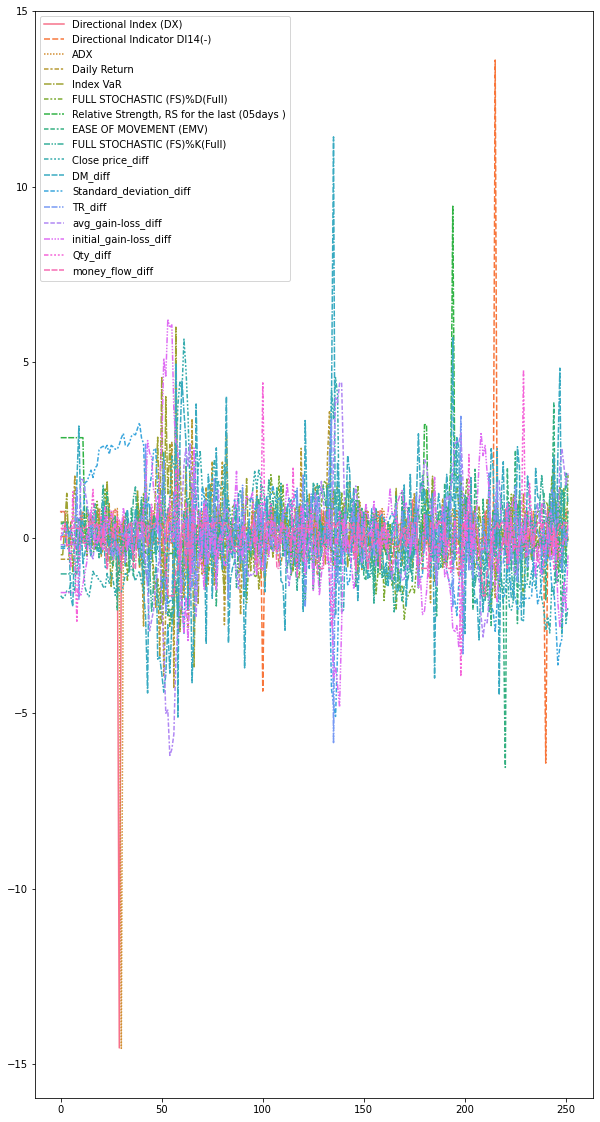

In [61]:
# Visualize the distribution of selected features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,20))
sns.lineplot(data = final_feature_df)